In [28]:
import numpy as np
import sklearn as skl
import functions as fx
import matplotlib.pyplot as plt
import sklearn.model_selection as sklm

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 

In [29]:
n               = 20
x               = np.sort(np.random.uniform(0, 1, n))
y               = np.sort(np.random.uniform(0, 1, n))
noise_level     = 0.01

design_matrix   = fx.DesignDesign(x,y,5)
x_m, y_m        = np.meshgrid(x,y)
franke          = fx.FrankeFunction(x_m, y_m, noise_level)

#### Plot Franke Function

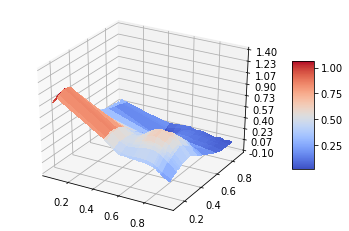

In [30]:
fig         = plt.figure() 
ax          = fig.gca(projection='3d')
surf        = ax.plot_surface(x_m, y_m, franke, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#### Ordinary Least Squares

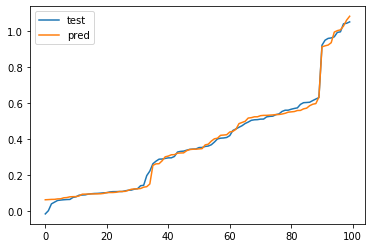

In [31]:
x_train, x_test, frank_train, frank_test = sklm.train_test_split(design_matrix,np.ravel(franke))

beta_ols, frank_pred = fx.OridinaryLeastSquares(x_train,frank_train, x_test)

frank_pred.shape

#print(x_train.shape)

pred = frank_pred.reshape((int(len(frank_pred)/n),n))

plt.plot(np.sort(frank_test), label='test')
plt.plot(np.sort(frank_pred), label='pred')
plt.legend()
plt.show()


In [32]:



r2, mse, r2_in, mse_in = fx.k_fold_cv(7, frank_test, x_test, fx.OridinaryLeastSquares, shuffle=True)

print(r2)
print(mse)

0.9795325482309288
0.0011122333573473158


In [58]:

n               = 100
x               = np.sort(np.random.uniform(0, 1, n))
y               = np.sort(np.random.uniform(0, 1, n))
noise_level     = 0.01

x_m, y_m        = np.meshgrid(x,y)
franke          = np.ravel(fx.FrankeFunction(x_m, y_m, noise_level))


In [76]:

maxpower = 13
r2=np.zeros(maxpower)
r2_in=np.zeros(maxpower)
mse=np.zeros(maxpower)
mse_in=np.zeros(maxpower)

for i in range(maxpower):
    
    design_matrix   = fx.DesignDesign(x,y,i+1)
    r2[i], mse[i], r2_in[i], mse_in[i] = fx.k_fold_cv(7, franke, design_matrix, fx.RidgeRegression,10e-05, shuffle=False)

    print((i+1)*100/maxpower)
    
    

7.6923076923076925
15.384615384615385
23.076923076923077
30.76923076923077
38.46153846153846
46.15384615384615
53.84615384615385
61.53846153846154
69.23076923076923
76.92307692307692
84.61538461538461
92.3076923076923
100.0


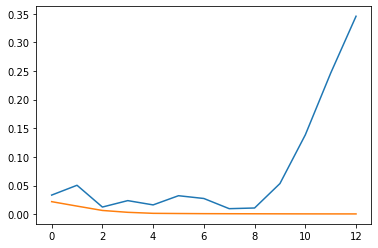

In [78]:
plt.plot(range(maxpower),mse)
plt.plot(range(maxpower),mse_in)
plt.show()


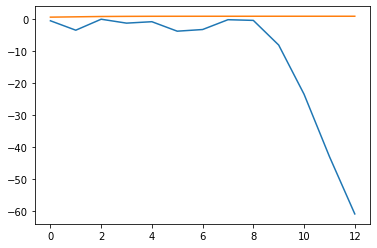

In [79]:
plt.plot(range(maxpower),r2)
plt.plot(range(maxpower),r2_in)
plt.show()
